In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
LANGSMITH_TRACING = os.getenv("LANGSMITH_TRACING")
LANGSMITH_ENDPOINT = os.getenv("LANGSMITH_ENDPOINT")
LANGSMITH_API_KEY = os.getenv("LANGSMITH_API_KEY")
LANGSMITH_PROJECT = os.getenv("LANGSMITH_PROJECT")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
# TRAVILY_PROJECT = os.getenv("TRAVILY_PROJECT")
SERPER_API_KEY = os.getenv("SERPER_API_KEY")


In [3]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["LANGSMITH_API_KEY"] = os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = os.getenv("LANGSMITH_TRACING")
os.environ["LANGSMITH_ENDPOINT"] = os.getenv("LANGSMITH_ENDPOINT")
os.environ["LANGSMITH_PROJECT"] = os.getenv("LANGSMITH_PROJECT")

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")



In [6]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest")

In [7]:
llm.invoke("hi")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--30d15218-080f-4ef1-b288-3c33b7305e8c-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

In [9]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [10]:

def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}


In [11]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

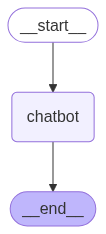

In [12]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:

input={"messages":["hi, my name is gagan"]}

In [14]:
app.invoke(input)


{'messages': [HumanMessage(content='hi, my name is gagan', additional_kwargs={}, response_metadata={}, id='20a6acdf-340d-444e-93cc-e94212cca4b3'),
  AIMessage(content="Hi Gagan, it's nice to meet you! How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--c8b952b2-1dd1-4b0d-ba5a-3e217ffece90-0', usage_metadata={'input_tokens': 7, 'output_tokens': 20, 'total_tokens': 27, 'input_token_details': {'cache_read': 0}})]}

In [15]:
@tool
def search(query: str):
    """this is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

In [16]:
tools=[search]

In [17]:
tool_node=ToolNode(tools)

In [18]:
llm_with_tool=llm.bind_tools(tools)

In [19]:

def call_model(state: MessagesState):
    messages = state['messages']
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [20]:

response=call_model({"messages": ["hi how are you?"]})

In [21]:

response


{'messages': [AIMessage(content="I'm doing well, thank you for asking. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--626c68ff-03b0-4e37-85f8-1d34bae0c8fe-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_token_details': {'cache_read': 0}})]}

In [22]:
messages = response['messages']

In [23]:

last_message=messages[-1]

In [24]:

last_message.tool_calls

[]

In [25]:
response=call_model({"messages": ["what is a weather in India?"]})

In [26]:
response


{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "weather in India"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--1cedefcf-f2c2-42bf-8b49-de3f9e36fc31-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'de494d84-a5d8-46f0-9831-2dc69381587e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 18, 'output_tokens': 5, 'total_tokens': 23, 'input_token_details': {'cache_read': 0}})]}

'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "weather in India"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--1cedefcf-f2c2-42bf-8b49-de3f9e36fc31-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'de494d84-a5d8-46f0-9831-2dc69381587e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 18, 'output_tokens': 5, 'total_tokens': 23, 'input_token_details': {'cache_read': 0}})]

In [27]:

messages = response['messages']
last_message=messages[-1]

last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in India'},
  'id': 'de494d84-a5d8-46f0-9831-2dc69381587e',
  'type': 'tool_call'}]

from above we are clear that the bind tool function provideus implicit property that we can call tool when the llms falis to generate the answer but not that ki har time we will bw  calling the tools but the answer is not being generated nowtoo so there we nned to create tthe worl=kfloe to genrate the answer

In [28]:
def router_function(state: MessagesState) -> Literal["tools", END]:
    #print(f"here is a state from should continue {state}")
    messages = state['messages']
    last_message = messages[-1]
    #print(f"here is a last message from should continue {last_message}")
    if last_message.tool_calls:
        return "tools"
    return END

In [29]:
# Define a new graph
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

app = workflow.compile()

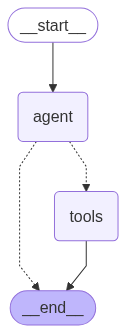

In [30]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:

app.invoke({"messages": ["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='93589497-6ce9-45d0-82a2-b1f2bfee370e'),
  AIMessage(content="I'm doing well, thank you for asking. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--d81abb1e-b4ea-4b48-9e45-e0fb341a8fc4-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_token_details': {'cache_read': 0}})]}

In [33]:

app.invoke({"messages": ["what is the weather in sf"]})

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='46c419a2-9f1d-4120-89a2-e969eced5cb2'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "weather in sf"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--373e8a81-d0ea-4b9d-9b2b-a96fd34f0eb1-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': '1b4ca8a7-d47b-409f-aab1-e6d640644dc9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 17, 'output_tokens': 5, 'total_tokens': 22, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content="It's 60 degrees and foggy.", name='search', id='0fb25b42-0ef9-4206-b973-70be265fe295', tool_call_id='1b4ca8a7-d47b-409f-aab1-e6d640644dc9')]}

In [34]:

workflow.add_edge("tools", 'agent')

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [35]:

app = workflow.compile()

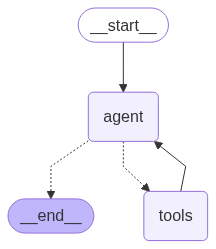

In [36]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [37]:
for output in app.stream({"messages": ["what is the weather in sf"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'search', 'arguments': '{"query": "weather in sf"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--513b9f5d-ace0-4390-8262-ab6fb3903fee-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'ec7daccb-921a-4cb1-bcc0-65ffff40507a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 17, 'output_tokens': 5, 'total_tokens': 22, 'input_token_details': {'cache_read': 0}})]}


here is output from tools
_______
{'messages': [ToolMessage(content="It's 60 degrees and foggy.", name='search', id='93749190-1cc7-4e5b-bb12-8724251b08f3', tool_call_id='ec7daccb-921a-4cb1-bcc0-65ffff40507a')]}


here is output from agent
_______
{'messages': [AIMessage(content="It's 60 degrees and foggy.", additional_kwargs={}, response_metadata={'promp

In [38]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [39]:

# Define a new graph
workflow3 = StateGraph(MessagesState)

workflow3.add_node("agent", call_model)
workflow3.add_node("tools", tool_node)

workflow3.add_edge(START, "agent")

workflow3.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

workflow3.add_edge("tools", 'agent')

In [40]:
app3 = workflow3.compile(checkpointer = memory)

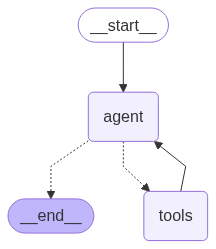

In [41]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [42]:

config = {"configurable": {"thread_id": "1"}}

In [43]:
events = app3.stream(
    {"messages": ["Hi there! My name is Sunny."]}, config, stream_mode="values"
)

In [44]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Sunny.
================================== Ai Message ==================================

Hi Sunny, nice to meet you! How can I help you today?


In [45]:

events = app3.stream(
    {"messages": ["can you tell me what was my name?"]}, config, stream_mode="values"
)

In [46]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

can you tell me what was my name?
================================== Ai Message ==================================

You told me your name is Sunny.


this completes our experiment now lets make a real one